# MUSA550 - Assignment 5: Exploring Yelp Reviews in Philadelphia
### Hang Zhao

In this assignment, we'll explore restaurant review data available through the [Yelp Dataset Challenge](https://www.yelp.com/dataset). The dataset includes Yelp data for user reviews and business information for many metropolitan areas. I've already downloaded this dataset (8 GB total!) and extracted out the data files for reviews and restaurants in Philadelphia. I've placed these data files into the `data` directory in this repository. 

This assignment is broken into two parts:

**Part 1:** Analyzing correlations between restaurant reviews and census data

We'll explore the relationship between restaurant reviews and the income levels of the restaurant's surrounding area.

**Part 2:** Exploring the impact of fast food restaurants

We'll run a sentiment analysis on reviews of fast food restaurants and estimate income levels in neighborhoods with fast food restaurants. We'll test how well our sentiment analysis works by comparing the number of stars to the sentiment of reviews.


**Background readings**
- [Does sentiment analysis work?](http://varianceexplained.org/r/yelp-sentiment/)
- [The Geography of Taste: Using Yelp to Study Urban Culture](https://www.mdpi.com/2220-9964/7/9/376/pdf/1)

## 1. Correlating restaurant ratings and income levels

In this part, we'll use the census API to download household income data and explore how it correlates with restaurant review data.

### 1.1 Query the Census API

Use the `cenpy` package to download **median household income in the past 12 months** by census tract from the 2021 ACS 5-year data set for your county of interest.

You have two options to find the correct variable names:
- Search through: [https://api.census.gov/data/2021/acs/acs5/variables.html](https://api.census.gov/data/2021/acs/acs5/variables.html)
- Initialize an API connection and use the `.varslike()` function to search for the proper keywords 

At the end of this step, you should have a pandas DataFrame holding the income data for all census tracts within the county being analyzed. Feel free to rename your variable from the ACS so it has a more meaningful name!

::: {.callout-caution}
Some census tracts won't have any value because there are not enough households in that tract. The census will use a negative number as a default value for those tracts. You can safely remove those tracts from the analysis!
:::

In [1]:
import cenpy

In [2]:
acs = cenpy.remote.APIConnection("ACSDT5Y2021")
acs

Connection to American Community Survey: 5-Year Estimates: Detailed Tables 5-Year (ID: https://api.census.gov/data/id/ACSDT5Y2021)

In [3]:
acs.variables.head(n=10)

,label,concept,predicateType,group,limit,predicateOnly,hasGeoCollectionSupport,attributes,required
for,Census API FIPS 'for' clause,Census API Geography Specification,fips-for,N/A,0,True,NaN,NaN,NaN
in,Census API FIPS 'in' clause,Census API Geography Specification,fips-in,N/A,0,True,NaN,NaN,NaN
ucgid,Uniform Census Geography Identifier clause,Census API Geography Specification,ucgid,N/A,0,True,True,NaN,NaN
B24022_060E,Estimate!!Total:!!Female:!!Service occupations...,SEX BY OCCUPATION AND MEDIAN EARNINGS IN THE P...,int,B24022,0,NaN,NaN,"B24022_060EA,B24022_060M,B24022_060MA",NaN
B19001B_014E,"Estimate!!Total:!!$100,000 to $124,999",HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 202...,int,B19001B,0,NaN,NaN,"B19001B_014EA,B19001B_014M,B19001B_014MA",NaN
B07007PR_019E,Estimate!!Total:!!Moved from different municip...,GEOGRAPHICAL MOBILITY IN THE PAST YEAR BY CITI...,int,B07007PR,0,NaN,NaN,"B07007PR_019EA,B07007PR_019M,B07007PR_019MA",NaN
B19101A_004E,"Estimate!!Total:!!$15,000 to $19,999",FAMILY INCOME IN THE PAST 12 MONTHS (IN 2021 I...,int,B19101A,0,NaN,NaN,"B19101A_004EA,B19101A_004M,B19101A_004MA",NaN
B24022_061E,Estimate!!Total:!!Female:!!Service occupations...,SEX BY OCCUPATION AND MEDIAN EARNINGS IN THE P...,int,B24022,0,NaN,NaN,"B24022_061EA,B24022_061M,B24022_061MA",NaN
B19001B_013E,"Estimate!!Total:!!$75,000 to $99,999",HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 202...,int,B19001B,0,NaN,NaN,"B19001B_013EA,B19001B_013M,B19001B_013MA",NaN
B07007PR_018E,Estimate!!Total:!!Moved from different municip...,GEOGRAPHICAL MOBILITY IN THE PAST YEAR BY CITI...,int,B07007PR,0,NaN,NaN,"B07007PR_018EA,B07007PR_018M,B07007PR_018MA",NaN


In [4]:
median_income = acs.varslike(
    pattern="MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS",
    by="concept",  # searches along concept column
).sort_index()
median_income.sample(n=10)

,label,concept,predicateType,group,limit,predicateOnly,hasGeoCollectionSupport,attributes,required
B19019_004E,Estimate!!Total:!!3-person households,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19019,0,NaN,NaN,"B19019_004EA,B19019_004M,B19019_004MA",NaN
B22008_003E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B22008,0,NaN,NaN,"B22008_003EA,B22008_003M,B22008_003MA",NaN
B19019_008E,Estimate!!Total:!!7-or-more-person households,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19019,0,NaN,NaN,"B19019_008EA,B19019_008M,B19019_008MA",NaN
B19019_003E,Estimate!!Total:!!2-person households,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19019,0,NaN,NaN,"B19019_003EA,B19019_003M,B19019_003MA",NaN
B22008_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B22008,0,NaN,NaN,"B22008_001EA,B22008_001M,B22008_001MA",NaN
B19013_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013,0,NaN,NaN,"B19013_001EA,B19013_001M,B19013_001MA",NaN
B19049_004E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19049,0,NaN,NaN,"B19049_004EA,B19049_004M,B19049_004MA",NaN
B19013D_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013D,0,NaN,NaN,"B19013D_001EA,B19013D_001M,B19013D_001MA",NaN
B19013E_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013E,0,NaN,NaN,"B19013E_001EA,B19013E_001M,B19013E_001MA",NaN
B19019_007E,Estimate!!Total:!!6-person households,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19019,0,NaN,NaN,"B19019_007EA,B19019_007M,B19019_007MA",NaN


In [5]:
acs.geographies['fips']

,name,geoLevelDisplay,referenceDate,requires,wildcard,optionalWithWCFor
0,us,010,2021-01-01,NaN,NaN,NaN
1,region,020,2021-01-01,NaN,NaN,NaN
2,division,030,2021-01-01,NaN,NaN,NaN
3,state,040,2021-01-01,NaN,NaN,NaN
4,county,050,2021-01-01,[state],[state],state
...,...,...,...,...,...,...
82,public use microdata area,795,2021-01-01,[state],[state],state
83,zip code tabulation area,860,2021-01-01,NaN,NaN,NaN
84,school district (elementary),950,2021-01-01,[state],[state],state
85,school district (secondary),960,2021-01-01,[state],[state],state


In [6]:
counties = cenpy.explorer.fips_table("COUNTY")
counties.head()

,0,1,2,3,4
0,AL,1,1,Autauga County,H1
1,AL,1,3,Baldwin County,H1
2,AL,1,5,Barbour County,H1
3,AL,1,7,Bibb County,H1
4,AL,1,9,Blount County,H1


In [7]:
# Trim to just Philadelphia
# Search for rows where name contains "Philadelphia"
counties.loc[ counties[3].str.contains("Philadelphia") ]

,0,1,2,3,4
2294,PA,42,101,Philadelphia County,H6


In [8]:
philly_county_code = "101"
pa_state_code = "42"

In [9]:
variables = [
    "NAME",
    "B19013_001E" # Total
]

In [10]:
philly_data = acs.query(
    cols=variables,
    geo_unit="block group:*",
    geo_filter={"state": pa_state_code, "county": philly_county_code, "tract": "*"},
)


philly_data.head()

,NAME,B19013_001E,state,county,tract,block group
0,"Block Group 1, Census Tract 1.01, Philadelphia...",-666666666,42,101,000101,1
1,"Block Group 2, Census Tract 1.01, Philadelphia...",-666666666,42,101,000101,2
2,"Block Group 3, Census Tract 1.01, Philadelphia...",-666666666,42,101,000101,3
3,"Block Group 4, Census Tract 1.01, Philadelphia...",97210,42,101,000101,4
4,"Block Group 5, Census Tract 1.01, Philadelphia...",109269,42,101,000101,5


In [11]:
for variable in variables:
    # Convert all variables EXCEPT for NAME
    if variable != "NAME":
        philly_data[variable] = philly_data[variable].astype(float)

In [12]:
philly_filtered = philly_data[philly_data['B19013_001E'] >= 0]

### 1.2 Download census tracts from the Census and merge the data from part 1.1

- Download census tracts for the desired geography using the `pygris` package
- Merge the downloaded census tracts with the household income DataFrame

In [13]:
import pygris

In [14]:
philly_block_groups = pygris.block_groups(
    state=pa_state_code, county=philly_county_code, year=2021
)

In [15]:
philly_block_groups.head(n=10)

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
124,42,101,989100,2,421019891002,Block Group 2,G5030,S,373653,7060,+40.0373207,-075.0177378,"POLYGON ((-75.02195 40.03435, -75.02191 40.034..."
125,42,101,989100,4,421019891004,Block Group 4,G5030,S,1399991,948653,+40.0407424,-074.9975532,"POLYGON ((-75.01254 40.03803, -75.01195 40.038..."
126,42,101,989100,3,421019891003,Block Group 3,G5030,S,820212,566882,+40.0297287,-075.0119000,"POLYGON ((-75.02251 40.03083, -75.02176 40.031..."
156,42,101,028300,1,421010283001,Block Group 1,G5030,S,69892,0,+40.0299231,-075.1408226,"POLYGON ((-75.14202 40.02998, -75.14200 40.030..."
158,42,101,028400,1,421010284001,Block Group 1,G5030,S,94792,0,+40.0293965,-075.1380180,"POLYGON ((-75.13966 40.02974, -75.13930 40.031..."
192,42,101,025700,3,421010257003,Block Group 3,G5030,S,89392,0,+40.0717286,-075.1919479,"POLYGON ((-75.19437 40.07059, -75.19419 40.070..."
193,42,101,001302,4,421010013024,Block Group 4,G5030,S,396274,60583,+39.9436029,-075.1858337,"POLYGON ((-75.19371 39.94226, -75.19268 39.942..."
194,42,101,020800,1,421010208001,Block Group 1,G5030,S,512635,0,+40.0184109,-075.1977311,"POLYGON ((-75.20606 40.01483, -75.20601 40.014..."
195,42,101,023600,2,421010236002,Block Group 2,G5030,S,282169,0,+40.0470905,-075.1953636,"POLYGON ((-75.19941 40.04647, -75.19881 40.047..."
196,42,101,010500,1,421010105001,Block Group 1,G5030,S,277095,0,+39.9702909,-075.2143967,"POLYGON ((-75.21777 39.97263, -75.21633 39.972..."


In [16]:
philly_final = philly_block_groups.merge(
    philly_filtered,
    left_on=["STATEFP", "COUNTYFP", "TRACTCE", "BLKGRPCE"],
    right_on=["state", "county", "tract", "block group"],
)

In [17]:
philly_final.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,NAME,B19013_001E,state,county,tract,block group
0,42,101,025700,3,421010257003,Block Group 3,G5030,S,89392,0,+40.0717286,-075.1919479,"POLYGON ((-75.19437 40.07059, -75.19419 40.070...","Block Group 3, Census Tract 257, Philadelphia ...",53171.0,42,101,025700,3
1,42,101,001302,4,421010013024,Block Group 4,G5030,S,396274,60583,+39.9436029,-075.1858337,"POLYGON ((-75.19371 39.94226, -75.19268 39.942...","Block Group 4, Census Tract 13.02, Philadelphi...",136813.0,42,101,001302,4
2,42,101,020800,1,421010208001,Block Group 1,G5030,S,512635,0,+40.0184109,-075.1977311,"POLYGON ((-75.20606 40.01483, -75.20601 40.014...","Block Group 1, Census Tract 208, Philadelphia ...",85333.0,42,101,020800,1
3,42,101,023600,2,421010236002,Block Group 2,G5030,S,282169,0,+40.0470905,-075.1953636,"POLYGON ((-75.19941 40.04647, -75.19881 40.047...","Block Group 2, Census Tract 236, Philadelphia ...",89167.0,42,101,023600,2
4,42,101,010500,1,421010105001,Block Group 1,G5030,S,277095,0,+39.9702909,-075.2143967,"POLYGON ((-75.21777 39.97263, -75.21633 39.972...","Block Group 1, Census Tract 105, Philadelphia ...",22705.0,42,101,010500,1


In [19]:
# Rename columns
philly_final = philly_final.rename(
    columns={
        "B19013_001E": "Total"  }# Total
)

In [ ]:
philly_final.head()

### 1.3 Load the restaurants data

The Yelp dataset includes data for 7,350 restaurants across the city. Load the data from the `data/` folder and use the `latitude` and `longitude` columns to create a GeoDataFrame after loading the JSON data. Be sure to set the right CRS on when initializing the GeoDataFrame!

**Notes**

The JSON data is in a "records" format. To load it, you'll need to pass the following keywords: 

- `orient='records'`
- `lines=True`

In [21]:
import pandas as pd
import geopandas as gpd

In [22]:
restaurant_data=pd.read_json("data/restaurants_philly.json.gz", orient='record', lines=True)

In [23]:
restaurant_data.head()

,business_id,latitude,longitude,name,review_count,stars,categories
0,MTSW4McQd7CbVtyjqoe9mw,39.955505,-75.155564,St Honore Pastries,80,4.0,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
1,MUTTqe8uqyMdBl186RmNeA,39.953949,-75.143226,Tuna Bar,245,4.0,"Sushi Bars, Restaurants, Japanese"
2,ROeacJQwBeh05Rqg7F6TCg,39.943223,-75.162568,BAP,205,4.5,"Korean, Restaurants"
3,QdN72BWoyFypdGJhhI5r7g,39.939825,-75.157447,Bar One,65,4.0,"Cocktail Bars, Bars, Italian, Nightlife, Resta..."
4,Mjboz24M9NlBeiOJKLEd_Q,40.022466,-75.218314,DeSandro on Main,41,3.0,"Pizza, Restaurants, Salad, Soup"


In [24]:
gdata = gpd.GeoDataFrame(
    restaurant_data,  # The pandas DataFrame
    geometry=gpd.points_from_xy(restaurant_data["longitude"], restaurant_data["latitude"]), # The geometry!
    crs="EPSG:4326", # The CRS 
)

### 1.4 Add tract info for each restaurant

Do a spatial join to identify which census tract each restaurant is within. Make sure each dataframe has the same CRS!

At the end of this step, you should have a new dataframe with a column identifying the tract number for each restaurant.

In [25]:
joined = gpd.sjoin(
    gdata,  # The point data for 311 tickets
    philly_block_groups.to_crs(gdata.crs),  # The neighborhoods (in the same CRS)
    predicate="within",
    how="left",
)
joined.head()

,business_id,latitude,longitude,name,review_count,stars,categories,geometry,index_right,STATEFP,...,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
0,MTSW4McQd7CbVtyjqoe9mw,39.955505,-75.155564,St Honore Pastries,80,4.0,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",POINT (-75.15556 39.95551),6286.0,42,...,000200,1,421010002001,Block Group 1,G5030,S,115923.0,0.0,+39.9553611,-075.1560966
1,MUTTqe8uqyMdBl186RmNeA,39.953949,-75.143226,Tuna Bar,245,4.0,"Sushi Bars, Restaurants, Japanese",POINT (-75.14323 39.95395),3404.0,42,...,000102,3,421010001023,Block Group 3,G5030,S,48303.0,0.0,+39.9533424,-075.1439968
2,ROeacJQwBeh05Rqg7F6TCg,39.943223,-75.162568,BAP,205,4.5,"Korean, Restaurants",POINT (-75.16257 39.94322),3692.0,42,...,001500,2,421010015002,Block Group 2,G5030,S,166161.0,0.0,+39.9421477,-075.1611428
3,QdN72BWoyFypdGJhhI5r7g,39.939825,-75.157447,Bar One,65,4.0,"Cocktail Bars, Bars, Italian, Nightlife, Resta...",POINT (-75.15745 39.93982),5492.0,42,...,001800,1,421010018001,Block Group 1,G5030,S,147883.0,0.0,+39.9396209,-075.1566638
4,Mjboz24M9NlBeiOJKLEd_Q,40.022466,-75.218314,DeSandro on Main,41,3.0,"Pizza, Restaurants, Salad, Soup",POINT (-75.21831 40.02247),4526.0,42,...,021000,4,421010210004,Block Group 4,G5030,S,299302.0,55718.0,+40.0229216,-075.2183537


### 1.5 Add income data to your restaurant data

Add the income data to your dataframe from the previous step, merging the census data based on the tract that each restaurant is within.

In [26]:
# Do GeoDataFrame.merge(DataFrame) here...
merged_data = joined.merge(philly_final, left_on="TRACTCE", right_on="tract")
merged_data

,business_id,latitude,longitude,name,review_count,stars,categories,geometry_x,index_right,STATEFP_x,...,AWATER_y,INTPTLAT_y,INTPTLON_y,geometry_y,NAME,Total,state,county,tract,block group
0,MTSW4McQd7CbVtyjqoe9mw,39.955505,-75.155564,St Honore Pastries,80,4.0,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",POINT (-75.15556 39.95551),6286.0,42,...,0,+39.9549929,-075.1527921,"POLYGON ((-75.15451 39.95428, -75.15441 39.954...","Block Group 2, Census Tract 2, Philadelphia Co...",250001.0,42,101,000200,2
1,MTSW4McQd7CbVtyjqoe9mw,39.955505,-75.155564,St Honore Pastries,80,4.0,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",POINT (-75.15556 39.95551),6286.0,42,...,0,+39.9553611,-075.1560966,"POLYGON ((-75.15811 39.95626, -75.15793 39.957...","Block Group 1, Census Tract 2, Philadelphia Co...",42308.0,42,101,000200,1
2,L_sXNadtVHjxMw7Yhvkj9Q,39.955454,-75.154900,Naoki Ramen,92,4.0,"Ramen, Restaurants, Japanese",POINT (-75.15490 39.95545),6286.0,42,...,0,+39.9549929,-075.1527921,"POLYGON ((-75.15451 39.95428, -75.15441 39.954...","Block Group 2, Census Tract 2, Philadelphia Co...",250001.0,42,101,000200,2
3,L_sXNadtVHjxMw7Yhvkj9Q,39.955454,-75.154900,Naoki Ramen,92,4.0,"Ramen, Restaurants, Japanese",POINT (-75.15490 39.95545),6286.0,42,...,0,+39.9553611,-075.1560966,"POLYGON ((-75.15811 39.95626, -75.15793 39.957...","Block Group 1, Census Tract 2, Philadelphia Co...",42308.0,42,101,000200,1
4,icp_IKE9zIkAqAucyS1vTA,39.955495,-75.155256,Hakka Beef House,33,4.5,"Restaurants, Chinese",POINT (-75.15526 39.95549),6286.0,42,...,0,+39.9549929,-075.1527921,"POLYGON ((-75.15451 39.95428, -75.15441 39.954...","Block Group 2, Census Tract 2, Philadelphia Co...",250001.0,42,101,000200,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19370,e0KzISSDK4b4unzirf3cYQ,40.004687,-75.178820,Mimmo's Pizza,47,2.0,"Pizza, Restaurants",POINT (-75.17882 40.00469),1209.0,42,...,0,+40.0057567,-075.1710769,"POLYGON ((-75.17863 40.00505, -75.17843 40.005...","Block Group 3, Census Tract 171, Philadelphia ...",22045.0,42,101,017100,3
19371,e0KzISSDK4b4unzirf3cYQ,40.004687,-75.178820,Mimmo's Pizza,47,2.0,"Pizza, Restaurants",POINT (-75.17882 40.00469),1209.0,42,...,0,+40.0022881,-075.1705064,"POLYGON ((-75.17159 40.00238, -75.17125 40.003...","Block Group 2, Census Tract 171, Philadelphia ...",26786.0,42,101,017100,2
19372,CgweZJAp5Fz-2XzjPE4Htw,40.018455,-75.097339,Wawa,6,2.0,"Restaurants, Food, Sandwiches, Delis, Convenie...",POINT (-75.09734 40.01845),10144.0,42,...,0,+40.0279627,-075.0900097,"POLYGON ((-75.09399 40.02704, -75.09351 40.027...","Block Group 3, Census Tract 292, Philadelphia ...",63558.0,42,101,029200,3
19373,CgweZJAp5Fz-2XzjPE4Htw,40.018455,-75.097339,Wawa,6,2.0,"Restaurants, Food, Sandwiches, Delis, Convenie...",POINT (-75.09734 40.01845),10144.0,42,...,3740,+40.0266525,-075.1091614,"POLYGON ((-75.11288 40.02746, -75.11280 40.027...","Block Group 1, Census Tract 292, Philadelphia ...",43894.0,42,101,029200,1


### 1.6 Make a plot of median household income vs. Yelp stars

Our dataset has the number of stars for each restaurant, rounded to the nearest 0.5 star. In this step, create a line plot that shows the average income value for each stars category (e.g., all restaurants with 1 star, 1.5 stars, 2 stars, etc.)

While their are multiple ways to do this, the [seaborn.lineplot()](https://seaborn.pydata.org/generated/seaborn.lineplot.html) is a great option. This can show the average value in each category as well as 95% uncertainty intervals. Use this function to plot the stars ("x") vs. average income ("y") for all of our restaurants, using the dataframe from last step. Be sure to format your figure to make it look nice!

**Question:** Is there a correlation between a restaurant's ratings and the income levels of its surrounding neighborhood?

In [27]:
import seaborn as sns

In [28]:
# Reset options to default
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
pd.reset_option('display.max_colwidth')

In [29]:
pd.set_option('display.max_columns', None)

In [30]:
merged_data.head()

,business_id,latitude,longitude,name,review_count,stars,categories,geometry_x,index_right,STATEFP_x,COUNTYFP_x,TRACTCE_x,BLKGRPCE_x,GEOID_x,NAMELSAD_x,MTFCC_x,FUNCSTAT_x,ALAND_x,AWATER_x,INTPTLAT_x,INTPTLON_x,STATEFP_y,COUNTYFP_y,TRACTCE_y,BLKGRPCE_y,GEOID_y,NAMELSAD_y,MTFCC_y,FUNCSTAT_y,ALAND_y,AWATER_y,INTPTLAT_y,INTPTLON_y,geometry_y,NAME,Total,state,county,tract,block group
0,MTSW4McQd7CbVtyjqoe9mw,39.955505,-75.155564,St Honore Pastries,80,4.0,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",POINT (-75.15556 39.95551),6286.0,42,101,000200,1,421010002001,Block Group 1,G5030,S,115923.0,0.0,+39.9553611,-075.1560966,42,101,000200,2,421010002002,Block Group 2,G5030,S,108369,0,+39.9549929,-075.1527921,"POLYGON ((-75.15451 39.95428, -75.15441 39.954...","Block Group 2, Census Tract 2, Philadelphia Co...",250001.0,42,101,000200,2
1,MTSW4McQd7CbVtyjqoe9mw,39.955505,-75.155564,St Honore Pastries,80,4.0,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",POINT (-75.15556 39.95551),6286.0,42,101,000200,1,421010002001,Block Group 1,G5030,S,115923.0,0.0,+39.9553611,-075.1560966,42,101,000200,1,421010002001,Block Group 1,G5030,S,115923,0,+39.9553611,-075.1560966,"POLYGON ((-75.15811 39.95626, -75.15793 39.957...","Block Group 1, Census Tract 2, Philadelphia Co...",42308.0,42,101,000200,1
2,L_sXNadtVHjxMw7Yhvkj9Q,39.955454,-75.154900,Naoki Ramen,92,4.0,"Ramen, Restaurants, Japanese",POINT (-75.15490 39.95545),6286.0,42,101,000200,1,421010002001,Block Group 1,G5030,S,115923.0,0.0,+39.9553611,-075.1560966,42,101,000200,2,421010002002,Block Group 2,G5030,S,108369,0,+39.9549929,-075.1527921,"POLYGON ((-75.15451 39.95428, -75.15441 39.954...","Block Group 2, Census Tract 2, Philadelphia Co...",250001.0,42,101,000200,2
3,L_sXNadtVHjxMw7Yhvkj9Q,39.955454,-75.154900,Naoki Ramen,92,4.0,"Ramen, Restaurants, Japanese",POINT (-75.15490 39.95545),6286.0,42,101,000200,1,421010002001,Block Group 1,G5030,S,115923.0,0.0,+39.9553611,-075.1560966,42,101,000200,1,421010002001,Block Group 1,G5030,S,115923,0,+39.9553611,-075.1560966,"POLYGON ((-75.15811 39.95626, -75.15793 39.957...","Block Group 1, Census Tract 2, Philadelphia Co...",42308.0,42,101,000200,1
4,icp_IKE9zIkAqAucyS1vTA,39.955495,-75.155256,Hakka Beef House,33,4.5,"Restaurants, Chinese",POINT (-75.15526 39.95549),6286.0,42,101,000200,1,421010002001,Block Group 1,G5030,S,115923.0,0.0,+39.9553611,-075.1560966,42,101,000200,2,421010002002,Block Group 2,G5030,S,108369,0,+39.9549929,-075.1527921,"POLYGON ((-75.15451 39.95428, -75.15441 39.954...","Block Group 2, Census Tract 2, Philadelphia Co...",250001.0,42,101,000200,2


In [31]:
merged_data['Total'].mean()

81058.04283870968

<Axes: xlabel='stars', ylabel='Total'>

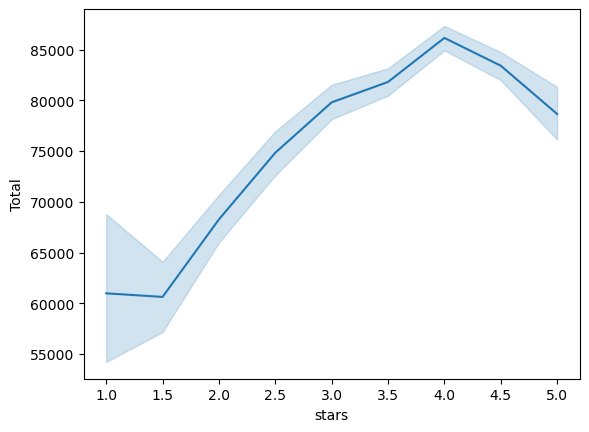

In [32]:
sns.lineplot(
    data=merged_data,
    x='stars',
    y='Total')

## 2. Fast food trends in Philadelphia

At the end of part 1, you should have seen a strong trend where higher income tracts generally had restaurants with better reviews. In this section, we'll explore the impact of fast food restaurants and how they might be impacting this trend. 

**Hypothesis**

1. Fast food restaurants are predominantly located in areas with lower median income levels. 
1. Fast food restaurants have worse reviews compared to typical restaurants. 

If true, these two hypotheses could help to explain the trend we found in part 1. Let's dive in and test our hypotheses!

### 2.1 Identify fast food restaurants

The "categories" column in our dataset contains multiple classifications for each restaurant. One such category is "Fast Food". In this step, add a new column called "is_fast_food" that is `True` if the "categories" column contains the term "Fast Food" and `False` otherwise

In [33]:
merged_data.loc[merged_data['categories'] != 'Fast Food', 'is_fast_food'] = 'False'
merged_data.loc[merged_data['categories'].str.contains('Fast Food'), 'is_fast_food'] = 'True'

In [37]:
merged_data.sample(n=10)

,business_id,latitude,longitude,name,review_count,stars,categories,geometry_x,index_right,STATEFP_x,COUNTYFP_x,TRACTCE_x,BLKGRPCE_x,GEOID_x,NAMELSAD_x,MTFCC_x,FUNCSTAT_x,ALAND_x,AWATER_x,INTPTLAT_x,INTPTLON_x,STATEFP_y,COUNTYFP_y,TRACTCE_y,BLKGRPCE_y,GEOID_y,NAMELSAD_y,MTFCC_y,FUNCSTAT_y,ALAND_y,AWATER_y,INTPTLAT_y,INTPTLON_y,geometry_y,NAME,Total,state,county,tract,block group,is_fast_food
9886,h9JsX6EAJ9TokfmoIbmWhQ,39.946666,-75.163993,Misso,14,4.0,"Restaurants, Specialty Food, Sushi Bars, Ethni...",POINT (-75.16399 39.94667),1611.0,42,101,001101,1,421010011011,Block Group 1,G5030,S,36067.0,0.0,+39.9455460,-075.1642618,42,101,001101,3,421010011013,Block Group 3,G5030,S,53345,0,+39.9453105,-075.1609140,"POLYGON ((-75.16228 39.94459, -75.16223 39.944...","Block Group 3, Census Tract 11.01, Philadelphi...",39085.0,42,101,001101,3,False
2164,8bXN8rouWRTKxvfuHNDRBw,39.956272,-75.168971,TGI Fridays,265,2.0,"American (Traditional), Bars, Restaurants, Nig...",POINT (-75.16897 39.95627),3410.0,42,101,000300,4,421010003004,Block Group 4,G5030,S,159485.0,0.0,+39.9570141,-075.1700148,42,101,000300,4,421010003004,Block Group 4,G5030,S,159485,0,+39.9570141,-075.1700148,"POLYGON ((-75.17268 39.95611, -75.17258 39.956...","Block Group 4, Census Tract 3, Philadelphia Co...",88194.0,42,101,000300,4,False
2883,0v5gedzRunqlbgtj3u1QCQ,39.953187,-75.202974,QDOBA Mexican Eats,65,3.5,"Restaurants, Fast Food, Event Planning & Servi...",POINT (-75.20297 39.95319),205.0,42,101,008802,5,421010088025,Block Group 5,G5030,S,70770.0,0.0,+39.9540229,-075.2033541,42,101,008802,2,421010088022,Block Group 2,G5030,S,102603,0,+39.9559911,-075.2021804,"POLYGON ((-75.20477 39.95594, -75.20446 39.955...","Block Group 2, Census Tract 88.02, Philadelphi...",16729.0,42,101,008802,2,True
10326,QQGyPctWtd9WOZnMKUChUQ,40.059745,-75.190854,McMenamin's Tavern,224,4.0,"Restaurants, Pubs, American (New), Bars, Night...",POINT (-75.19085 40.05974),9478.0,42,101,038800,2,421010388002,Block Group 2,G5030,S,205950.0,0.0,+40.0572213,-075.1943895,42,101,038800,1,421010388001,Block Group 1,G5030,S,790799,4751,+40.0602959,-075.1987496,"POLYGON ((-75.20477 40.05486, -75.20469 40.054...","Block Group 1, Census Tract 388, Philadelphia ...",64798.0,42,101,038800,1,False
8523,GVRTpquM8rSPe7x8XkmmrA,39.949756,-75.148062,Taps Fill Station,22,4.5,"Nightlife, Wine Bars, Cocktail Bars, Bars, Bee...",POINT (-75.14806 39.94976),397.0,42,101,000101,2,421010001012,Block Group 2,G5030,S,60664.0,0.0,+39.9499842,-075.1500255,42,101,000101,4,421010001014,Block Group 4,G5030,S,130577,0,+39.9502981,-075.1456484,"POLYGON ((-75.14919 39.94926, -75.14911 39.949...","Block Group 4, Census Tract 1.01, Philadelphia...",97210.0,42,101,000101,4,False
4451,Zpaf7JKJ7Z1F7bcpKnBBNg,39.949858,-75.160455,Midtown,5,3.0,"Restaurants, American (Traditional), Bars, Nig...",POINT (-75.16045 39.94986),1997.0,42,101,000600,1,421010006001,Block Group 1,G5030,S,79423.0,0.0,+39.9497770,-075.1614869,42,101,000600,2,421010006002,Block Group 2,G5030,S,93229,0,+39.9490501,-075.1556507,"POLYGON ((-75.15880 39.94944, -75.15863 39.950...","Block Group 2, Census Tract 6, Philadelphia Co...",87697.0,42,101,000600,2,False
13013,f4QAry-KSSkNT3fZ034NQw,39.924954,-75.175654,Danny's Cafe,10,4.0,"Food, Restaurants, Cambodian, Coffee & Tea, Sa...",POINT (-75.17565 39.92495),1728.0,42,101,003901,4,421010039014,Block Group 4,G5030,S,112921.0,0.0,+39.9256027,-075.1743917,42,101,003901,1,421010039011,Block Group 1,G5030,S,114949,0,+39.9251855,-075.1712223,"POLYGON ((-75.17307 39.92429, -75.17294 39.924...","Block Group 1, Census Tract 39.01, Philadelphi...",52072.0,42,101,003901,1,False
18809,mx31XU-QJIxObRGH_qvy3w,39.978348,-75.130836,HAPP'S,23,4.5,"Food, Restaurants, Coffee & Tea, Sandwiches, B...",POINT (-75.13084 39.97835),1234.0,42,101,015700,3,421010157003,Block Group 3,G5030,S,305255.0,0.0,+39.9768522,-075.1353407,42,101,015700,2,421010157002,Block Group 2,G5030,S,69048,0,+39.9788673,-075.1352374,"POLYGON ((-75.13666 39.97794, -75.13656 

### 2.2 Calculate the median income for fast food and otherwise

Group by the "is_fast_food" column and calculate the median income for restaurants that are and are not fast food. You should find that income levels are lower in tracts with fast food.

*Note:* this is just an estimate, since we are calculating a median of median income values.

In [38]:
groupby_fast = merged_data.groupby("is_fast_food").median()

groupby_fast

/var/folders/8y/y89rxkzj5bv2c24kw9zjzy9c0000gn/T/ipykernel_2144/1530561349.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupby_fast = merged_data.groupby("is_fast_food").median()


,latitude,longitude,review_count,stars,index_right,ALAND_x,AWATER_x,ALAND_y,AWATER_y,Total
is_fast_food,,,,,,,,,,
False,39.955413,-75.160578,32.0,4.0,3390.0,129277.0,0.0,115923.0,0.0,73279.0
True,39.959412,-75.159020,19.0,2.5,3367.0,163390.0,0.0,128171.0,0.0,58047.0


### 2.3 Load fast food review data

In the rest of part 2, we're going to run a sentiment analysis on the reviews for fast food restaurants. 
The review data for all fast food restaurants identified in part 2.1 is already stored in the `data/` folder. The data is stored as a JSON file and you can use `pandas.read_json` to load it. 

**Notes**

The JSON data is in a "records" format. To load it, you'll need to pass the following keywords: 

- `orient='records'`
- `lines=True`

In [39]:
review_data = pd.read_json("data/reviews_philly_fast_food.json.gz",orient='records',lines=True)

### 2.4 Trim to the most popular fast food restaurants

There's too many reviews to run a sentiment analysis on all of them in a reasonable time. Let's trim our reviews dataset to the most popular fast food restaurants, using the list provided below.

You will need to get the "business_id" values for each of these restaurants from the restaurants data loaded in part 1.3. Then, trim the reviews data to include reviews only for those business IDs.

In [40]:
review_data.head(n=10)

,business_id,review_id,stars,text
0,kgMEBZG6rjkGeFzPaIM4MQ,E-yGr1OhsUBxNeUVLDVouA,1,I know I shouldn't expect much but everything ...
1,FKrP06TDAKtxNG1vrRQcQQ,0IpFZoaY_RRNjha8Q_Wz6w,2,Perfect place to go if you like waiting 20 mi...
2,w9hS5x1F52Id-G1KTrAOZg,0KlwfaHZyvao41_3S47dyg,2,Was not a fan of their cheesesteak. Their wiz ...
3,fr2qDm_mY1afIGMvqsKUCg,oKSUOq7pCQzyypFDSa1HoA,3,Ok this is an aberration from my city foodie r...
4,fr2qDm_mY1afIGMvqsKUCg,6SMUmb7Npwnq6AusxqOXzQ,5,My family has been customers of George's for y...
5,QrIV69RPS4LTpIwPoL22_w,LO1VbNOfA1FtTPnuNL9XLw,4,i think that this was good. i like applebees a...
6,FKrP06TDAKtxNG1vrRQcQQ,ChEe7cTIDhGSjOzQxXGRaw,2,This place is really poor on the service. I do...
7,FKrP06TDAKtxNG1vrRQcQQ,-02mXFOmtdjKXGYy_okLMw,5,"Our server, Julliette, was very very nice to t..."
8,PjknD8uD_0tisZQbomiYoQ,6TqKBa-HDiq2_W_ip2AItA,5,I am only giving 5 stars because the Shamrock ...
9,QrIV69RPS4LTpIwPoL22_w,6CehSaDzaZHetnnfP3QAPg,1,Every dam time we come here it's an issue!!! E...


In [41]:
popular_fast_food = [
    "McDonald's",
    "Wendy's",
    "Subway",
    "Popeyes Louisiana Kitchen",
    "Taco Bell",
    "KFC",
    "Burger King",
]

In [42]:
trim = restaurant_data.loc[restaurant_data["name"].isin(popular_fast_food)]
review_trim = review_data.loc[review_data["business_id"].isin(trim["business_id"])]
review_trim.head()

,business_id,review_id,stars,text
0,kgMEBZG6rjkGeFzPaIM4MQ,E-yGr1OhsUBxNeUVLDVouA,1,I know I shouldn't expect much but everything ...
8,PjknD8uD_0tisZQbomiYoQ,6TqKBa-HDiq2_W_ip2AItA,5,I am only giving 5 stars because the Shamrock ...
13,kgMEBZG6rjkGeFzPaIM4MQ,NGaXI03qbtBLshjfJV4pbQ,3,"Dirty bathrooms and very slow service, but I w..."
17,LACylKxImNI29DKUQpWuHw,HHy9yIjW07VHUE6nXVbsVA,3,Burger King is an okay alternative to Mcdonald...
21,gq4zw-ru_rkZ2UBIanaZFQ,yMZTK5B_0SAdUXSrIkXrmA,1,ive tried going here four times with no succes...


In [43]:
len(review_trim)

2823

### 2.5 Run the emotions classifier on fast food reviews

Run a sentiment analysis on the reviews data from the previous step. Use the [DistilBERT model](https://huggingface.co/bhadresh-savani/distilbert-base-uncased-emotion) that can predict emotion labels (anger, fear, sadness, joy, love, and surprise). Transform the result from the classifier into a DataFrame so that you have a column for each of the emotion labels.

In [44]:
from transformers import pipeline

In [45]:
# Remove rows with missing descriptions
step_0 = review_trim.dropna(subset=["text"])
step_05 = step_0.loc[step_0["text"] != ""]

# Strip out spaces and convert to a list
descriptions = step_05["text"].str.strip().tolist()

In [47]:
# The model
model = "bhadresh-savani/distilbert-base-uncased-emotion"

# Initialize our sentiment analyzer
emotion_classifier = pipeline(
    task="text-classification",  # The task we are doing
    model=model,  # The specific model name
    top_k=None,  # Predict all labels, not just top ones
    tokenizer=model,  # Tokenize inputs using model tokenizer
    truncation=True,  # Truncate text if we need to
)

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [48]:
%%time 

emotion_scores = emotion_classifier(descriptions)

CPU times: user 2min 38s, sys: 38.4 s, total: 3min 17s
Wall time: 1min 16s


In [49]:
emotion_scores[0]

[{'label': 'sadness', 'score': 0.7338715195655823},
 {'label': 'fear', 'score': 0.2506738603115082},
 {'label': 'anger', 'score': 0.011038964614272118},
 {'label': 'joy', 'score': 0.002758037531748414},
 {'label': 'surprise', 'score': 0.0010148948058485985},
 {'label': 'love', 'score': 0.000642782892100513}]

In [50]:
emotion = pd.DataFrame(
    [{d["label"]: d["score"] for d in dd} for dd in emotion_scores]
).assign(text=descriptions)

In [52]:
emotion_labels = ["anger", "fear", "sadness", "joy", "surprise", "love"]

### 2.6 Identify the predicted emotion for each text

Use the pandas [idxmax()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmax.html) to identify the predicted emotion for each review, and add this value to a new column called "prediction"

The predicted emotion has the highest confidence score across all emotion labels for a particular label.

In [54]:
emotion[emotion_labels].idxmax(axis=1)

0       sadness
1           joy
2           joy
3           joy
4           joy
         ...   
2818       love
2819      anger
2820      anger
2821      anger
2822      anger
Length: 2823, dtype: object

In [55]:
emotion['prediction'] = emotion[emotion_labels].idxmax(axis=1)

In [56]:
emotion.head()

,sadness,fear,anger,joy,surprise,love,text,prediction
0,0.733872,0.250674,0.011039,0.002758,0.001015,0.000643,I know I shouldn't expect much but everything ...,sadness
1,0.000230,0.000126,0.000165,0.998759,0.000246,0.000475,I am only giving 5 stars because the Shamrock ...,joy
2,0.000216,0.000088,0.000153,0.998563,0.000161,0.000819,"Dirty bathrooms and very slow service, but I w...",joy
3,0.000838,0.000403,0.000811,0.996928,0.000140,0.000880,Burger King is an okay alternative to Mcdonald...,joy
4,0.005284,0.000753,0.006195,0.985421,0.001620,0.000726,ive tried going here four times with no succes...,joy


### 2.7 Combine the ratings and sentiment data

Combine the data from part 2.4 (reviews data) and part 2.6 (emotion data). Use the `pd.concat()` function and combine along the column axis.

**Note:** You'll need to reset the index of your reviews data frame so it matches the emotion data index (it should run from 0 to the length of the data - 1).


In [57]:
review_trim.reset_index(drop=True, inplace=True)

In [58]:
concat_data = pd.concat([emotion, review_trim], axis=1)

In [59]:
concat_data.head()

,sadness,fear,anger,joy,surprise,love,text,prediction,business_id,review_id,stars,text
0,0.733872,0.250674,0.011039,0.002758,0.001015,0.000643,I know I shouldn't expect much but everything ...,sadness,kgMEBZG6rjkGeFzPaIM4MQ,E-yGr1OhsUBxNeUVLDVouA,1,I know I shouldn't expect much but everything ...
1,0.000230,0.000126,0.000165,0.998759,0.000246,0.000475,I am only giving 5 stars because the Shamrock ...,joy,PjknD8uD_0tisZQbomiYoQ,6TqKBa-HDiq2_W_ip2AItA,5,I am only giving 5 stars because the Shamrock ...
2,0.000216,0.000088,0.000153,0.998563,0.000161,0.000819,"Dirty bathrooms and very slow service, but I w...",joy,kgMEBZG6rjkGeFzPaIM4MQ,NGaXI03qbtBLshjfJV4pbQ,3,"Dirty bathrooms and very slow service, but I w..."
3,0.000838,0.000403,0.000811,0.996928,0.000140,0.000880,Burger King is an okay alternative to Mcdonald...,joy,LACylKxImNI29DKUQpWuHw,HHy9yIjW07VHUE6nXVbsVA,3,Burger King is an okay alternative to Mcdonald...
4,0.005284,0.000753,0.006195,0.985421,0.001620,0.000726,ive tried going here four times with no succes...,joy,gq4zw-ru_rkZ2UBIanaZFQ,yMZTK5B_0SAdUXSrIkXrmA,1,ive tried going here four times with no succes...


### 2.8 Plot sentiment vs. stars

We now have a dataframe with the predicted primary emotion for each review and the associated number of stars for each review. Let's explore two questions:

1. Does sentiment analysis work? Do reviews with fewer stars have negative emotions?
1. For our fast food restaurants, are reviews generally positive or negative? 

Use seaborn's [histplot()](https://seaborn.pydata.org/generated/seaborn.histplot.html) to make a stacked bar chart showing the breakdown of each emotion for each stars category (1 star, 2 stars, etc.). A few notes:

- To stack multiple emotion labels in one bar, use the `multiple="stack"` keyword
- The `discrete=True` can be helpful to tell seaborn our stars values are discrete categories


<Axes: xlabel='stars', ylabel='Count'>

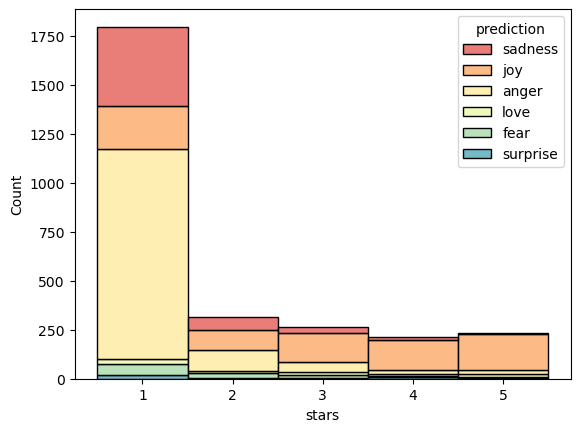

In [67]:
sns.histplot(data=concat_data, x='stars', hue="prediction", multiple="stack", discrete=True, palette="Spectral")

**Question:** What does your chart indicate for the effectiveness of our sentiment analysis? Does our original hypothesis about fast food restaurants seem plausible?

### This chart indicates that our sentiment analysis is effective in terms of
### predicting the attitude of the reviews, whereas the 1-star reviews desmonstrate 
### bunch of anger and sadness, where as 5-star reviews show greater joy. 
### As for our hypothesis about fast food restaurants, it is true that reviews are
### generally negative. 